# Import

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from scipy.stats.mstats import winsorize

from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [74]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_gt.csv')

In [75]:
train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12224,46,admin.,married,high.school,unknown,no,no,telephone,jul,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,36387,32,admin.,married,university.degree,no,yes,yes,cellular,jun,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,22703,36,technician,single,university.degree,no,no,no,cellular,aug,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,32742,30,services,single,high.school,no,yes,yes,cellular,may,...,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,40547,76,retired,divorced,basic.4y,no,no,no,cellular,aug,...,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes


# Data Exploration

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              32950 non-null  int64  
 1   age             32950 non-null  int64  
 2   job             32950 non-null  object 
 3   marital         32950 non-null  object 
 4   education       32950 non-null  object 
 5   default         32950 non-null  object 
 6   housing         32950 non-null  object 
 7   loan            32950 non-null  object 
 8   contact         32950 non-null  object 
 9   month           32950 non-null  object 
 10  day_of_week     32950 non-null  object 
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8238 non-null   int64  
 1   age             8238 non-null   int64  
 2   job             8238 non-null   object 
 3   marital         8238 non-null   object 
 4   education       8238 non-null   object 
 5   default         8238 non-null   object 
 6   housing         8238 non-null   object 
 7   loan            8238 non-null   object 
 8   contact         8238 non-null   object 
 9   month           8238 non-null   object 
 10  day_of_week     8238 non-null   object 
 11  campaign        8238 non-null   int64  
 12  pdays           8238 non-null   int64  
 13  previous        8238 non-null   int64  
 14  poutcome        8238 non-null   object 
 15  emp.var.rate    8238 non-null   float64
 16  cons.price.idx  8238 non-null   float64
 17  cons.conf.idx   8238 non-null   f

In [78]:
# replace unknown values with nan
train_fixed=train.replace('unknown', np.nan, inplace=False)
train=train_fixed
print(train.isnull().sum(), '\n')

id                   0
age                  0
job                257
marital             62
education         1388
default           6853
housing            799
loan               799
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64 



In [79]:
# replace unknown values with nan
test_fixed=test.replace('unknown', np.nan, inplace=False)
test=test_fixed
print(test.isnull().sum(), '\n')

id                   0
age                  0
job                 73
marital             18
education          343
default           1744
housing            191
loan               191
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64 



# preprocessing

In [80]:
# check correlation between all numerical variables

train.drop('id', axis = 1, inplace = True)
test.drop('id', axis = 1, inplace = True)

## explore outlier & remove outlier

### explore outlier with boxplot (numerical variable)

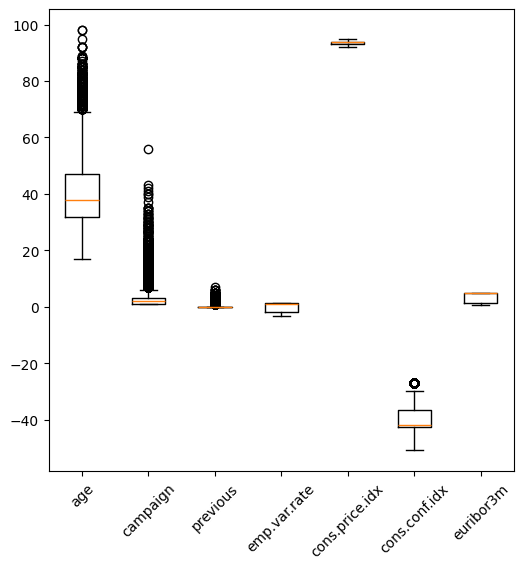

In [81]:
plt.figure(figsize = (6, 6))
plt.boxplot([train['age'], train['campaign'], train['previous'], train['emp.var.rate'], train['cons.price.idx'], train['cons.conf.idx'], train['euribor3m']])
plt.xticks(ticks = range(1, 8), labels = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], rotation = 45)
plt.show()

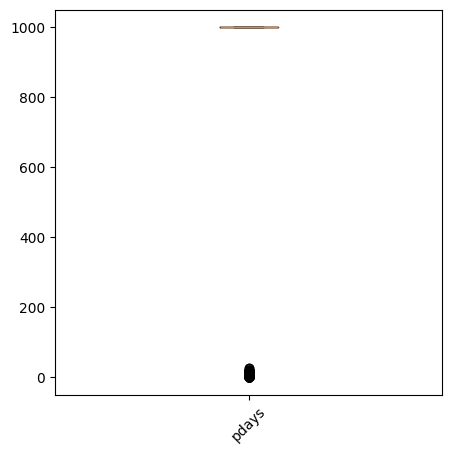

In [82]:
plt.figure(figsize = (5, 5))
plt.boxplot(train['pdays'])
plt.xticks(ticks = range(1, 2), labels = ['pdays'], rotation = 45)
plt.show()
# we have to drop pdays

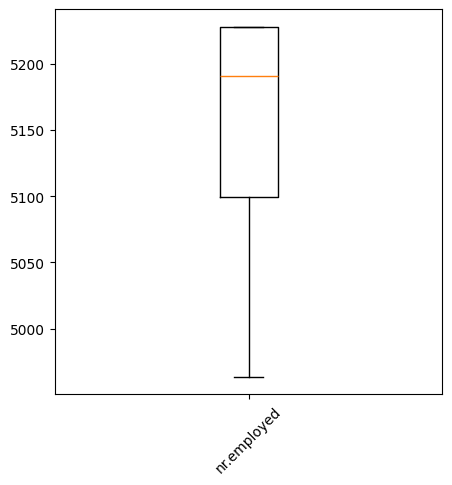

In [83]:
plt.figure(figsize = (5, 5))
plt.boxplot(train['nr.employed'])
plt.xticks(ticks = range(1, 2), labels = ['nr.employed'], rotation = 45)
plt.show()

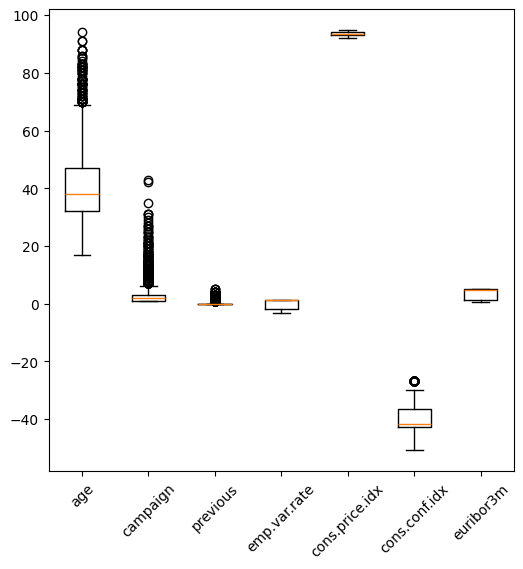

In [84]:
plt.figure(figsize = (6, 6))
plt.boxplot([test['age'], test['campaign'], test['previous'], test['emp.var.rate'], test['cons.price.idx'], test['cons.conf.idx'], test['euribor3m']])
plt.xticks(ticks = range(1, 8), labels = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], rotation = 45)
plt.show()

### remove outlier

In [85]:
def remove_outliers_box(data, columns):

    data_df = data.copy()

    for col in columns:

        Q1 = data_df[col].quantile(0.25)
        Q3 = data_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        max_value = data_df.loc[(data_df[col] >= lower_bound) & (data_df[col] <= upper_bound), col].max()
        data_df.loc[(data_df[col] <= lower_bound) | (data_df[col] >= upper_bound), col] = max_value

    return data_df

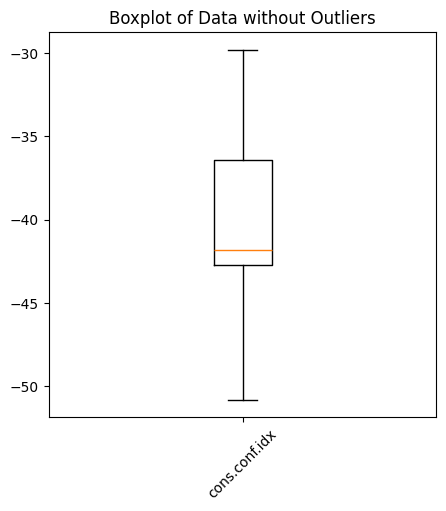

In [86]:
cleaned_data = remove_outliers_box(train, ['cons.conf.idx'])

plt.figure(figsize=(5, 5))
plt.boxplot(cleaned_data['cons.conf.idx'].values)
plt.xticks(ticks=range(1, 2), labels=['cons.conf.idx'], rotation=45)
plt.title('Boxplot of Data without Outliers')
plt.show()

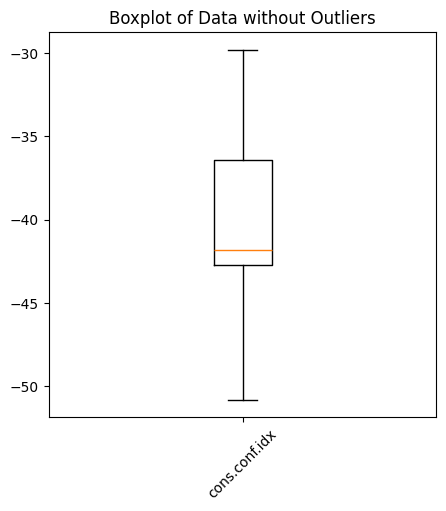

In [87]:
test_cleaned_data = remove_outliers_box(test, ['cons.conf.idx'])

plt.figure(figsize=(5, 5))
plt.boxplot(test_cleaned_data['cons.conf.idx'].values)
plt.xticks(ticks=range(1, 2), labels=['cons.conf.idx'], rotation=45)
plt.title('Boxplot of Data without Outliers')
plt.show()

In [88]:
train = cleaned_data
train['age'] = train['age'].astype(int)

In [89]:
test = test_cleaned_data
test['age'] = test['age'].astype(int)

## fill nan

### fill nan proportionally

In [90]:
job_total=pd.DataFrame(train['job'].value_counts())

job_dict = {job: 0 for job in train['job'].unique() if job != 'nan'}

for job in train['job'].unique():
  train_ = train[train['job'] == job]
  job_dict[job] = len(train_) / len(train['job'].values)

job_dict = {k: f"{v:.2f}" for k, v in job_dict.items()}
print(job_dict)

job_null = train['job'].isnull().sum()

job_count = {job: 0 for job in train['job'].unique()}

for key in job_dict.keys():
  job_count[key] = job_null * float(job_dict[key])

job_count = {k: f"{v:.2f}" for k, v in job_count.items()}
print(job_count)

{'admin.': '0.25', 'technician': '0.16', 'services': '0.10', 'retired': '0.04', 'entrepreneur': '0.04', 'blue-collar': '0.22', 'unemployed': '0.02', 'student': '0.02', 'self-employed': '0.03', 'management': '0.07', 'housemaid': '0.03', nan: '0.00'}
{'admin.': '64.25', 'technician': '41.12', 'services': '25.70', 'retired': '10.28', 'entrepreneur': '10.28', 'blue-collar': '56.54', 'unemployed': '5.14', 'student': '5.14', 'self-employed': '7.71', 'management': '17.99', 'housemaid': '7.71', nan: '0.00'}


In [91]:
train_job_null = train[train['job'].isna()]

train_job_null.iloc[0:65, 1] = 'admin.'
train_job_null.iloc[65:107, 1] = 'technician'
train_job_null.iloc[107:134, 1] = 'services'
train_job_null.iloc[134:144, 1] = 'retired'
train_job_null.iloc[144:154, 1] = 'entrepreneur'
train_job_null.iloc[154:212, 1] = 'blue-collar'
train_job_null.iloc[212:217, 1] = 'unemployed'
train_job_null.iloc[217:222, 1] = 'student'
train_job_null.iloc[222:230, 1] = 'self-employed'
train_job_null.iloc[230:249, 1] = 'management'
train_job_null.iloc[249:257, 1] = 'housemaid'

In [92]:
train = train.dropna(subset = ['job'])
train = pd.concat([train, train_job_null], axis = 0, ignore_index = True)

train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,NaN,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,53,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
32946,44,housemaid,single,basic.9y,NaN,NaN,NaN,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
32947,48,housemaid,married,NaN,NaN,yes,no,cellular,jul,mon,7,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32948,60,housemaid,married,university.degree,no,yes,no,telephone,jun,mon,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


In [93]:
marital_total=pd.DataFrame(train['marital'].value_counts())

marital_dict = {i: 0 for i in train['marital'].unique()}

for i in train['marital'].unique():
  train_ = train[train['marital'] == i]
  marital_dict[i] = len(train_) / len(train['marital'].values)

marital_dict = {k: f"{v:.2f}" for k, v in marital_dict.items()}
print(marital_dict)

marital_null = train['marital'].isnull().sum()

marital_count = {i: 0 for i in train['marital'].unique()}

for key in marital_dict.keys():
  marital_count[key] = marital_null * float(marital_dict[key])

marital_count = {k: f"{v:.2f}" for k, v in marital_count.items()}
print(marital_count)

{'married': '0.61', 'single': '0.28', 'divorced': '0.11', nan: '0.00'}
{'married': '37.82', 'single': '17.36', 'divorced': '6.82', nan: '0.00'}


In [94]:
train_marital_null = train[train['marital'].isna()]

train_marital_null.iloc[0:38, 2] = 'married'
train_marital_null.iloc[38:55, 2] = 'single'
train_marital_null.iloc[55:62, 2] = 'divorced'

In [95]:
train = train.dropna(subset = ['marital'])
train = pd.concat([train, train_marital_null], axis = 0, ignore_index = True)
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,NaN,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,32,technician,divorced,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
32946,41,technician,divorced,NaN,no,yes,no,cellular,jul,mon,13,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32947,49,technician,divorced,NaN,NaN,yes,yes,cellular,jul,mon,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32948,45,blue-collar,divorced,NaN,no,yes,yes,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes


In [96]:
train['default'] = train['default'].fillna('no')
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,no,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,32,technician,divorced,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
32946,41,technician,divorced,NaN,no,yes,no,cellular,jul,mon,13,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32947,49,technician,divorced,NaN,no,yes,yes,cellular,jul,mon,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32948,45,blue-collar,divorced,NaN,no,yes,yes,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes


In [97]:
loan_total=pd.DataFrame(train['loan'].value_counts())

loan_dict = {i: 0 for i in train['loan'].unique()}

for i in train['loan'].unique():
  train_ = train[train['loan'] == i]
  loan_dict[i] = len(train_) / len(train['loan'].values)

loan_dict = {k: f"{v:.2f}" for k, v in loan_dict.items()}
print(loan_dict)

loan_null = train['loan'].isnull().sum()

loan_count = {i: 0 for i in train['loan'].unique()}

for key in loan_dict.keys():
  loan_count[key] = loan_null * float(loan_dict[key])

loan_count = {k: f"{v:.2f}" for k, v in loan_count.items()}
print(loan_count)

{'no': '0.82', 'yes': '0.15', nan: '0.00'}
{'no': '655.18', 'yes': '119.85', nan: '0.00'}


In [98]:
train_loan_null = train[train['loan'].isna()]

train_loan_null.iloc[0:675, 6] = 'no'
train_loan_null.iloc[675:799, 6] = 'yes'

In [99]:
train = train.dropna(subset = ['loan'])
train = pd.concat([train, train_loan_null], axis = 0, ignore_index = True)
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,no,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,44,technician,married,NaN,no,NaN,yes,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
32946,29,retired,married,university.degree,no,NaN,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
32947,45,blue-collar,married,NaN,no,NaN,yes,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
32948,44,housemaid,single,basic.9y,no,NaN,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [100]:
train.isnull().sum()

age                  0
job                  0
marital              0
education         1388
default              0
housing            799
loan                 0
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [101]:
test.isnull().sum()

age                  0
job                 73
marital             18
education          343
default           1744
housing            191
loan               191
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [102]:
job_total = pd.DataFrame(test['job'].value_counts())

job_dict = {job: 0 for job in test['job'].unique() if job != 'nan'}

for job in test['job'].unique():
  test_ = test[test['job'] == job]
  job_dict[job] = len(test_) / len(test['job'].values)

job_dict = {k: f"{v:.2f}" for k, v in job_dict.items()}
print(job_dict)

job_null = test['job'].isnull().sum()

job_count = {job: 0 for job in test['job'].unique()}

for key in job_dict.keys():
  job_count[key] = job_null * float(job_dict[key])

job_count = {k: f"{v:.2f}" for k, v in job_count.items()}
print(job_count)

{'admin.': '0.25', 'entrepreneur': '0.03', 'unemployed': '0.02', 'services': '0.10', 'blue-collar': '0.22', 'housemaid': '0.02', 'self-employed': '0.03', 'retired': '0.04', 'technician': '0.17', 'management': '0.07', 'student': '0.02', nan: '0.00'}
{'admin.': '18.25', 'entrepreneur': '2.19', 'unemployed': '1.46', 'services': '7.30', 'blue-collar': '16.06', 'housemaid': '1.46', 'self-employed': '2.19', 'retired': '2.92', 'technician': '12.41', 'management': '5.11', 'student': '1.46', nan: '0.00'}


In [103]:
test_job_null = test[test['job'].isna()]

test_job_null.iloc[0:19, 1] = 'admin.'
test_job_null.iloc[19:32, 1] = 'technician'
test_job_null.iloc[32:40, 1] = 'services'
test_job_null.iloc[40:43, 1] = 'retired'
test_job_null.iloc[43:45, 1] = 'entrepreneur'
test_job_null.iloc[45:62, 1] = 'blue-collar'
test_job_null.iloc[62:63, 1] = 'unemployed'
test_job_null.iloc[63:64, 1] = 'student'
test_job_null.iloc[64:66, 1] = 'self-employed'
test_job_null.iloc[66:71, 1] = 'management'
test_job_null.iloc[71:73, 1] = 'housemaid'

In [104]:
test = test.dropna(subset = ['job'])
test = pd.concat([test, test_job_null], axis = 0, ignore_index = True)

test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4,43,services,married,high.school,NaN,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,55,management,married,basic.4y,NaN,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8234,48,management,married,basic.6y,no,no,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
8235,34,management,married,basic.4y,no,yes,no,cellular,apr,thu,1,999,0,nonexistent,-1.8,93.075,-47.1,1.406,5099.1,yes
8236,44,housemaid,divorced,NaN,no,no,no,cellular,apr,tue,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no


In [105]:
marital_total=pd.DataFrame(test['marital'].value_counts())

marital_dict = {i: 0 for i in test['marital'].unique()}

for i in test['marital'].unique():
  test_ = test[test['marital'] == i]
  marital_dict[i] = len(test_) / len(test['marital'].values)

marital_dict = {k: f"{v:.2f}" for k, v in marital_dict.items()}
print(marital_dict)

marital_null = test['marital'].isnull().sum()

marital_count = {i: 0 for i in test['marital'].unique()}

for key in marital_dict.keys():
  marital_count[key] = marital_null * float(marital_dict[key])

marital_count = {k: f"{v:.2f}" for k, v in marital_count.items()}
print(marital_count)

{'married': '0.60', 'divorced': '0.11', 'single': '0.29', nan: '0.00'}
{'married': '10.80', 'divorced': '1.98', 'single': '5.22', nan: '0.00'}


In [106]:
test_marital_null = test[test['marital'].isna()]

test_marital_null.iloc[0:11, 2] = 'married'
test_marital_null.iloc[11:16, 2] = 'single'
test_marital_null.iloc[16:18, 2] = 'divorced'

In [107]:
test = test.dropna(subset = ['marital'])
test = pd.concat([test, test_marital_null], axis = 0, ignore_index = True)
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4,43,services,married,high.school,NaN,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,54,housemaid,single,basic.4y,no,yes,no,cellular,jul,wed,13,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
8234,37,blue-collar,single,basic.6y,NaN,no,no,telephone,jun,mon,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
8235,31,entrepreneur,single,university.degree,no,no,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-29.8,0.722,5017.5,yes
8236,66,retired,divorced,basic.9y,no,yes,no,cellular,aug,wed,3,999,2,failure,-2.9,92.201,-31.4,0.879,5076.2,yes


In [108]:
test['default'] = test['default'].fillna('no')
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4,43,services,married,high.school,no,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,54,housemaid,single,basic.4y,no,yes,no,cellular,jul,wed,13,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
8234,37,blue-collar,single,basic.6y,no,no,no,telephone,jun,mon,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
8235,31,entrepreneur,single,university.degree,no,no,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-29.8,0.722,5017.5,yes
8236,66,retired,divorced,basic.9y,no,yes,no,cellular,aug,wed,3,999,2,failure,-2.9,92.201,-31.4,0.879,5076.2,yes


In [109]:
loan_total=pd.DataFrame(test['loan'].value_counts())

loan_dict = {i: 0 for i in test['loan'].unique()}

for i in test['loan'].unique():
  test_ = test[test['loan'] == i]
  loan_dict[i] = len(test_) / len(test['loan'].values)

loan_dict = {k: f"{v:.2f}" for k, v in loan_dict.items()}
print(loan_dict)

loan_null = test['loan'].isnull().sum()

loan_count = {i: 0 for i in test['loan'].unique()}

for key in loan_dict.keys():
  loan_count[key] = loan_null * float(loan_dict[key])

loan_count = {k: f"{v:.2f}" for k, v in loan_count.items()}
print(loan_count)

{'no': '0.83', 'yes': '0.15', nan: '0.00'}
{'no': '158.53', 'yes': '28.65', nan: '0.00'}


In [110]:
test_loan_null = test[test['loan'].isna()]

test_loan_null.iloc[0:160, 6] = 'no'
test_loan_null.iloc[160:191, 6] = 'yes'

In [111]:
test = test.dropna(subset = ['loan'])
test = pd.concat([test, test_loan_null], axis = 0, ignore_index = True)
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4,43,services,married,high.school,no,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,40,admin.,single,high.school,no,NaN,yes,cellular,nov,mon,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8234,51,admin.,divorced,university.degree,no,NaN,yes,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8235,48,blue-collar,married,basic.6y,no,NaN,yes,telephone,jun,fri,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
8236,39,admin.,married,university.degree,no,NaN,yes,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### fill nan with KNN

#### label encoding (categorical variable)

In [112]:
from sklearn.preprocessing import LabelEncoder

columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

label_encoders = {}

for col in columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

# print labels and their corresponding encoding values
for col, le in label_encoders.items():
    print(col + ":", le.classes_)

job: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
marital: ['divorced' 'married' 'single']
education: ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' nan]
default: ['no' 'yes']
housing: ['no' 'yes' nan]
loan: ['no' 'yes']
contact: ['cellular' 'telephone']
month: ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week: ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome: ['failure' 'nonexistent' 'success']
y: ['no' 'yes']


In [113]:
train['education'] = train['education'].replace(7, np.nan)
train['housing'] = train['housing'].replace(2, np.nan)

#### knn

In [114]:
from sklearn.impute import KNNImputer

# declare imputer
imputer = KNNImputer(n_neighbors = 5)

filled_train = imputer.fit_transform(train)
filled_train = pd.DataFrame(filled_train, columns = train.columns)

In [115]:
train = filled_train
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,999.0,0.0,1.0,1.4,93.918,-42.7,4.966,5228.1,0.0
1,32.0,0.0,1.0,6.0,0.0,1.0,1.0,0.0,4.0,3.0,1.0,999.0,0.0,1.0,-2.9,92.963,-40.8,1.262,5076.2,1.0
2,36.0,9.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,999.0,0.0,1.0,1.4,93.444,-36.1,4.964,5228.1,0.0
3,30.0,7.0,2.0,3.0,0.0,1.0,1.0,0.0,6.0,1.0,1.0,999.0,2.0,0.0,-1.8,92.893,-46.2,1.299,5099.1,0.0
4,76.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,999.0,1.0,0.0,-1.7,94.027,-38.3,0.886,4991.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,44.0,9.0,1.0,4.8,0.0,0.8,1.0,0.0,1.0,3.0,1.0,999.0,0.0,1.0,1.4,93.444,-36.1,4.963,5228.1,0.0
32946,29.0,5.0,1.0,6.0,0.0,0.8,1.0,1.0,6.0,0.0,2.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.855,5191.0,0.0
32947,45.0,1.0,1.0,1.6,0.0,0.8,1.0,1.0,6.0,4.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.859,5191.0,0.0
32948,44.0,3.0,2.0,2.0,0.0,0.4,1.0,1.0,6.0,0.0,2.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.855,5191.0,0.0


In [116]:
train['age'] = train['age'].astype(int)
train['job'] = train['job'].astype(int)
train['marital'] = train['marital'].astype(int)
train['education'] = round(train['education']).astype(int)
train['default'] = train['default'].astype(int)
train['housing'] = round(train['housing']).astype(int)
train['loan'] = train['loan'].astype(int)
train['contact'] = train['contact'].astype(int)
train['month'] = train['month'].astype(int)
train['day_of_week'] = train['day_of_week'].astype(int)
train['campaign'] = train['campaign'].astype(int)
train['pdays'] = train['pdays'].astype(int)
train['previous'] = train['previous'].astype(int)
train['poutcome'] = train['poutcome'].astype(int)

train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,0,1,3,0,0,0,1,3,2,3,999,0,1,1.4,93.918,-42.7,4.966,5228.1,0.0
1,32,0,1,6,0,1,1,0,4,3,1,999,0,1,-2.9,92.963,-40.8,1.262,5076.2,1.0
2,36,9,2,6,0,0,0,0,1,0,5,999,0,1,1.4,93.444,-36.1,4.964,5228.1,0.0
3,30,7,2,3,0,1,1,0,6,1,1,999,2,0,-1.8,92.893,-46.2,1.299,5099.1,0.0
4,76,5,0,0,0,0,0,0,1,3,1,999,1,0,-1.7,94.027,-38.3,0.886,4991.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,44,9,1,5,0,1,1,0,1,3,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0.0
32946,29,5,1,6,0,1,1,1,6,0,2,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0.0
32947,45,1,1,2,0,1,1,1,6,4,1,999,0,1,1.1,93.994,-36.4,4.859,5191.0,0.0
32948,44,3,2,2,0,0,1,1,6,0,2,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0.0


In [117]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

label_encoders = {}

for col in columns:
    le = LabelEncoder()
    # train_copy[col] = le.fit_transform(train_copy[col])
    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

# print labels and their corresponding encoding values
for col, le in label_encoders.items():
    print(col + ":", le.classes_)

job: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
marital: ['divorced' 'married' 'single']
education: ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' nan]
default: ['no']
housing: ['no' 'yes' nan]
loan: ['no' 'yes']
contact: ['cellular' 'telephone']
month: ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week: ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome: ['failure' 'nonexistent' 'success']
y: ['no' 'yes']


In [118]:
test['education'] = test['education'].replace(7, np.nan)
test['housing'] = test['housing'].replace(2, np.nan)

In [119]:
# declare imputer
imputer = KNNImputer(n_neighbors = 5)

filled_test = imputer.fit_transform(test)
filled_test = pd.DataFrame(filled_test, columns = test.columns)

In [120]:
test = filled_test

In [121]:
test['age'] = test['age'].astype(int)
test['job'] = test['job'].astype(int)
test['marital'] = test['marital'].astype(int)
test['education'] = round(test['education']).astype(int)
test['default'] = test['default'].astype(int)
test['housing'] = round(test['housing']).astype(int)
test['loan'] = test['loan'].astype(int)
test['contact'] = test['contact'].astype(int)
test['month'] = test['month'].astype(int)
test['day_of_week'] = test['day_of_week'].astype(int)
test['campaign'] = test['campaign'].astype(int)
test['pdays'] = test['pdays'].astype(int)
test['previous'] = test['previous'].astype(int)
test['poutcome'] = test['poutcome'].astype(int)
test['y'] = test['y'].astype(int)

test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,0,1,6,0,0,0,0,7,1,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
1,36,2,1,6,0,1,1,1,4,4,1,999,0,1,1.4,94.465,-41.8,4.864,5228.1,0
2,27,10,1,3,0,1,0,0,6,1,4,999,0,1,-1.8,92.893,-46.2,1.244,5099.1,0
3,39,0,1,6,0,1,0,0,1,1,4,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0
4,43,7,1,3,0,1,0,1,4,0,2,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,40,0,2,3,0,1,1,0,7,1,2,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
8234,51,0,0,6,0,1,1,1,6,4,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8235,48,1,1,1,0,0,1,1,4,0,1,999,0,1,1.4,94.465,-41.8,4.967,5228.1,0
8236,39,0,1,6,0,0,1,1,6,4,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [122]:
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [123]:
test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Standardization

In [124]:
data = train.drop(columns = ['pdays', 'y'], axis = 1)
data -= data.mean(axis = 0) # zero-center
for col in data.columns:
    std = data[col].std()
    if std != 0:
        data[col] = data[col]/std

target = train['y']
target = target.astype(int)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, shuffle = True, random_state = 34)

In [126]:
test_X = test.drop(columns = ['pdays', 'y'], axis = 1)
test_X -= test_X.mean(axis = 0)
for col in test_X.columns:
    std = test_X[col].std()
    if std != 0:
        test_X[col] = test_X[col]/std

test_target = test['y']
test_target = test_target.astype(int)

# Model

In [127]:
from bayes_opt import BayesianOptimization
import warnings
warnings.filterwarnings("ignore")

## First Approach: Resampling

In [137]:
def train (learning_rate,max_depth):

  # initialize number of models,
  # list for saving models and predictions,
  # and dataframe for saving P(y=1)

  n= 5
  GB_models=[]
  prob=pd.DataFrame()
  y_pred=[]

  # train model with resampled data
  for i in range(n):
    X_resampled,y_resampled=SMOTE(random_state=i).fit_resample(X_train,y_train) # resample
    model=GradientBoostingClassifier(random_state=i,
                                     learning_rate=learning_rate,
                                     max_depth=int(max_depth),
                                     n_estimators=100,
                                     n_iter_no_change=10)
    model.fit(X_resampled,y_resampled)
    GB_models.append(model) # save models in GB_models list

  # return P(y=1), predicted by models in GB_models list
  for trained_model in GB_models:
    y_prob=trained_model.predict_proba(X_test)[:,1]
    prob[f'{trained_model}']=y_prob

  tot_prob=prob.mean(axis=1) # caculate the avg of P(y=1) of all models in GB_models list

  # find the best threshold for maximum f1
  from sklearn.metrics import precision_recall_curve
  precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
  f1_scores = 2*recall*precision/(recall+precision)
  threshold=thresholds[np.argmax(f1_scores)]

  # if the avg P(y=1) is bigger than threshold, predict as 1, else 0
  y_pred=np.where(tot_prob > threshold, 1, 0)

  # return f1 based on the prediction
  f1=f1_score(y_test, y_pred)
  return f1

pbounds = {'learning_rate': [0.0001,0.1],
           'max_depth':[3,25]
           }
optimizer = BayesianOptimization(
    f=train,
    pbounds=pbounds,
    random_state=1,
)

In [138]:
optimizer.maximize(
    init_points=7,
    n_iter=10
)

|   iter    |  target   | learni... | max_depth |
-------------------------------------------------
| 1         | 0.0       | 0.04176   | 18.85     |
| 2         | 0.4759    | 0.0001114 | 9.651     |
| 3         | 0.4902    | 0.01476   | 5.031     |
| 4         | 0.4931    | 0.01871   | 10.6      |
| 5         | 0.4643    | 0.03974   | 14.85     |
| 6         | 0.0       | 0.04198   | 18.07     |
| 7         | 0.0       | 0.02052   | 22.32     |
| 8         | 0.4997    | 0.08861   | 3.003     |
| 9         | 0.4618    | 0.09963   | 12.97     |
| 10        | 0.4965    | 0.09918   | 7.161     |
| 11        | 0.5031    | 0.09845   | 3.883     |
| 12        | 0.4952    | 0.09954   | 6.236     |
| 13        | 0.0       | 0.008562  | 11.58     |
| 14        | 0.4625    | 0.004264  | 13.87     |
| 15        | 0.0       | 0.01549   | 25.0      |
| 16        | 0.4994    | 0.09163   | 8.328     |
| 17        | 0.4544    | 0.09587   | 16.08     |


In [140]:
# test
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# train model w/ optimal hyperparameters
model = GradientBoostingClassifier(
    random_state=42,
    learning_rate=0.09845,
    max_depth=int(3.883),
    n_estimators=100,
    n_iter_no_change=10
)
model.fit(X_resampled, y_resampled)

# predict for real test data, test_X
y_prob = model.predict_proba(test_X)[:, 1]

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(test_target, y_prob)
f1_scores = 2 * precision * recall / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(best_threshold)

# 임계값 기준으로 예측값 생성
y_pred = (y_prob > best_threshold).astype(int)

# F1 score 계산
final_f1 = f1_score(test_target, y_pred)
print(f"Test Data F1 Score: {final_f1}")

0.9886162742020994
Test Data F1 Score: 0.24131901074194353


## Second Approach: Assign Weights

In [141]:
from lightgbm import LGBMClassifier

def train (learning_rate,max_depth,num_leaves,n_estimators,reg_alpha,reg_lambda):

  # list for saving models and predictions,
  # and dataframe for saving P(y=1)
  y_pred=[]
  
  # train model with parameter 'is_unbalance=True'
  model=LGBMClassifier(learning_rate=learning_rate,
                        max_depth=int(max_depth),is_unbalance=True,verbose=-1,
                       num_leaves=int(num_leaves),n_estimators=int(n_estimators),
                       reg_alpha=reg_alpha,reg_lambda=reg_lambda)

  model.fit(X_train,y_train)
  
  y_prob=model.predict_proba(X_test)[:,1]

  # find the best threshold for maximum f1
  from sklearn.metrics import precision_recall_curve
  precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
  f1_scores = 2*recall*precision/(recall+precision)
  threshold=thresholds[np.argmax(f1_scores)]

  # if the avg P(y=1) is bigger than threshold, predict as 1, else 0
  y_pred=np.where(y_prob > threshold, 1, 0)

  # return f1 based on the prediction
  f1=f1_score(y_test, y_pred)
  return f1,y_pred,threshold

def train_wrapper(**kwargs):
    f1, _, _ = train(**kwargs)
    return f1

pbounds = {'learning_rate': [0.0001,0.1],
           'max_depth':[10,200],
           'n_estimators':[10,300],
           'num_leaves':[10,100],
           'reg_alpha':[0.0,0.1],
           'reg_lambda':[0,0.1]
           }

optimizer = BayesianOptimization(
    f=train_wrapper,
    pbounds=pbounds,
    random_state=1
)

In [142]:
optimizer.maximize(
    init_points=7,
    n_iter=10
)

|   iter    |  target   | learni... | max_depth | n_esti... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------
| 1         | 0.5095    | 0.04176   | 146.9     | 10.03     | 37.21     | 0.01468   | 0.009234  |
| 2         | 0.5111    | 0.01871   | 75.66     | 125.1     | 58.49     | 0.04192   | 0.06852   |
| 3         | 0.5093    | 0.02052   | 176.8     | 17.94     | 70.34     | 0.04173   | 0.05587   |
| 4         | 0.5016    | 0.01412   | 47.64     | 242.2     | 97.14     | 0.03134   | 0.06923   |
| 5         | 0.5053    | 0.08765   | 180.0     | 34.66     | 13.51     | 0.01698   | 0.08781   |
| 6         | 0.5136    | 0.009925  | 90.01     | 287.8     | 57.98     | 0.06919   | 0.03155   |
| 7         | 0.5116    | 0.06868   | 168.6     | 15.3      | 77.51     | 0.09889   | 0.07482   |
| 8         | 0.491     | 0.07795   | 90.98     | 285.5     | 55.6      | 0.05174   | 0.01359   |
| 9         | 0.5079

In [143]:
# best performance using optimal hyperparameters w/ standardization
train(learning_rate=0.009925,max_depth=90.01,n_estimators=287.8,num_leaves=57.98,reg_alpha=0.06919,reg_lambda=0.03155)[0]

0.5135603000577034

In [144]:
# train model w/ optimal hyperparameters w/ standardization
model = LGBMClassifier(learning_rate=0.009925,
                       max_depth=int(90.01),
                       n_estimators=int(287.8),
                       num_leaves=int(57.98),
                       reg_alpha=0.06919,
                       reg_lambda=0.03155)

model.fit(X_train, y_train)

# predict for real test data, test_X
y_prob = model.predict_proba(test_X)[:, 1]

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(test_target, y_prob)
f1_scores = 2 * precision * recall / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(best_threshold)

# 임계값 기준으로 예측값 생성
test_y_pred = (y_prob > best_threshold).astype(int)

# F1 score 계산
final_f1 = f1_score(test_target, test_y_pred)
print(f"Test Data F1 Score: {final_f1}")

0.2584025887974645
Test Data F1 Score: 0.5042016806722689


## correct predicted data

In [132]:
y_pred=pd.Series(train(learning_rate=0.009925,max_depth=90.01,n_estimators=287.8,num_leaves=57.98,reg_alpha=0.06919,reg_lambda=0.03155)[1])
y_pred.index = y_test.index

In [133]:
correct_indices = (y_test == y_pred)
df = pd.DataFrame(correct_indices)

true_count = int(df.sum())
print(true_count)

5747


In [134]:
# acc
train_acc = (true_count / len(y_test)) * 100
print(f"train_acc: {train_acc:.2f}")

train_acc: 87.21


In [135]:
test_correct_indices = (test_target == test_y_pred)
test_df = pd.DataFrame(test_correct_indices)

test_true_count = int(test_df.sum())
print(test_true_count)

7235


In [136]:
# acc
test_acc = (test_true_count / len(test_target)) * 100
print(f"test acc: {test_acc:.2f}")

test acc: 87.82
